In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 2: Load dataset
df = pd.read_csv("ADANIPORTS.csv")

# Show first 5 rows
df.head()



Matplotlib is building the font cache; this may take a moment.


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


Null values:
 Close    0
dtype: int64


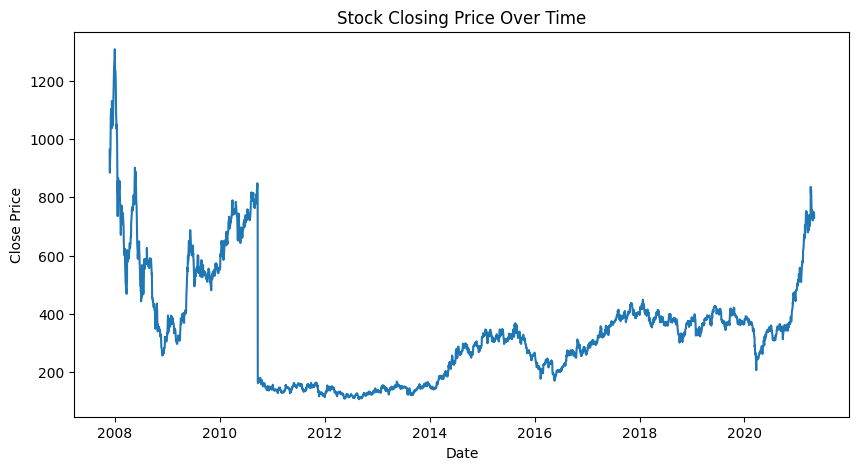

In [2]:
# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Keep only 'Date' and 'Close' for simplicity
data = df[['Date', 'Close']].copy()
data.set_index('Date', inplace=True)

# Check for null values
print("Null values:\n", data.isnull().sum())

# Plot Close price
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [3]:
# Prepare features (previous day's close) and labels (next day's close)
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)

X = data[['Prev_Close']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


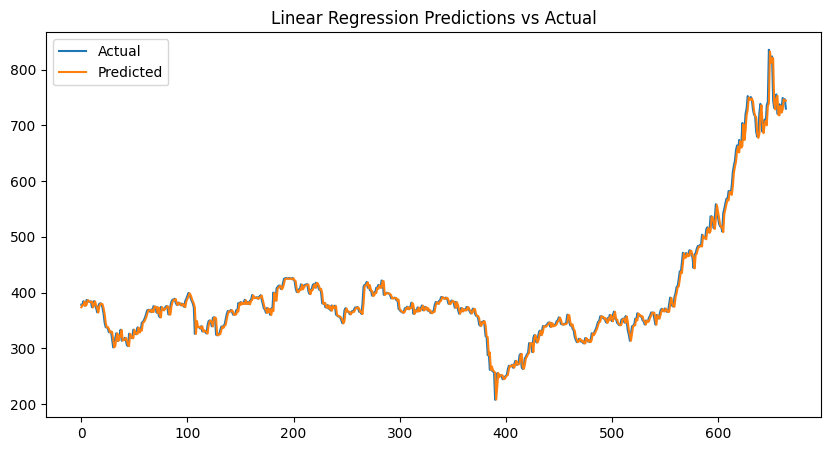

✅ Linear Regression model saved as linear_model.pkl


In [4]:
# Train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.legend()
plt.title("Linear Regression Predictions vs Actual")
plt.show()

# Save the model as .pkl
with open("linear_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)
print("✅ Linear Regression model saved as linear_model.pkl")


In [5]:
# Use MinMaxScaler to normalize Close prices
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['Close']])

# Create sequences of 60 timesteps
X_lstm, y_lstm = [], []
for i in range(60, len(scaled_data)):
    X_lstm.append(scaled_data[i-60:i, 0])
    y_lstm.append(scaled_data[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Train-test split (80-20)
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]


c:\Users\sindh\OneDrive\Desktop\adaniproj\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0034 - val_loss: 6.9769e-04
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0010 - val_loss: 3.3203e-04
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 8.4614e-04 - val_loss: 9.2624e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 7.9410e-04 - val_loss: 3.7853e-04
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 6.9150e-04 - val_loss: 2.6218e-04
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 5.8935e-04 - val_loss: 3.7016e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 5.8301e-04 - val_loss: 2.2093e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 5.2559e-04 - val_loss: 1.8975e-04
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 4.7048e-04 - val_loss: 2.0587e-04
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 4.5743e-04 - val_loss: 1.6997e-04
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 3.9468e-04 - val_

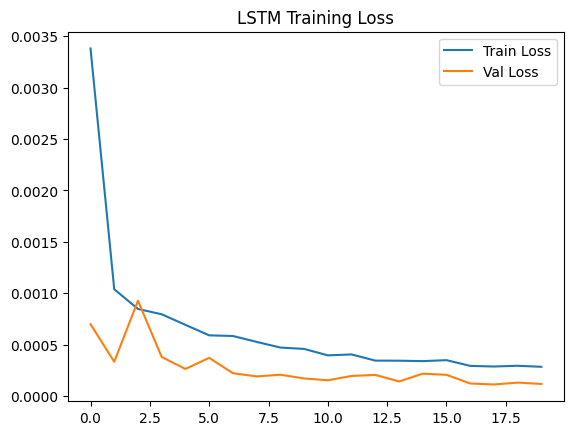

✅ LSTM model saved as lstm_model.h5


In [6]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("LSTM Training Loss")
plt.show()

# Save LSTM model as .h5
model.save("lstm_model.h5")
print("✅ LSTM model saved as lstm_model.h5")
